## Capital Bike Share

**Washington, DC**

What has the effect of 2020 *events* been on bike share ridership?

data from https://www.capitalbikeshare.com/system-data

June 11, 2020

*edit: updated Jan 1, 2021*

messy code. Need to atomize, get function, clean up. And such (downloaded data, create checks). Add more years if memory permits...

### downloading zip files of dc bikeshare open data

https://s3.amazonaws.com/capitalbikeshare-data/index.html

In [35]:
import os
import urllib
import requests
import zipfile
import io

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

**Prep for downloading csv data**

In [36]:
os.getcwd()

'/home/samuel/Documents/research/project-dc/data/capital-bikeshare/csvs/2020'

In [37]:
# get list of all urls....

url = "https://s3.amazonaws.com/capitalbikeshare-data/"
endname = "-capitalbikeshare-tripdata.zip"

years = range(11,21)
yearlist = []

for yr in years:
    year = "20" + str(yr)
    yearlist.append(year)

months = range(1,13)
monthlist = []

for yr in yearlist[-3:]:
    for month in months:
        date = str(yr) + str(month).zfill(2)
        monthlist.append(date)

names = yearlist[:-3] + monthlist

urls = []

for name in names:
    tmp = url + name + endname
    urls.append(tmp)

In [90]:
# download all files and unzip to folder...

for url in urls[:-1]:
    r = requests.get(url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall('/home/samuel/Documents/research/project-dc/data/capital-bikeshare/csvs')

In [38]:
os.chdir('/home/samuel/Documents/research/project-dc/data/capital-bikeshare/')
os.getcwd()

'/home/samuel/Documents/research/project-dc/data/capital-bikeshare'

In [39]:
# create list of all downloaded filenames 
# note: I had moved into individual year folders (maybe a mistake?)

folder = '/home/samuel/Documents/research/project-dc/data/capital-bikeshare/'

#files2017 = os.listdir(folder + 'csvs/2017')
files2018 = os.listdir(folder + 'csvs/2018')
files2019 = os.listdir(folder + 'csvs/2019')
files2020 = os.listdir(folder + 'csvs/2020')

In [40]:
# load up files...

#os.chdir(folder + 'csvs/2017')
#dfs_2017 = []
#for file in files2017:
#    dfs_2017.append(pd.read_csv(file))
#print(len(dfs_2017))

os.chdir(folder + 'csvs/2018')
dfs_2018 = []
for file in files2018:
    dfs_2018.append(pd.read_csv(file))
print(len(dfs_2018))


os.chdir(folder + 'csvs/2019')
dfs_2019 = []
for file in files2019:
    dfs_2019.append(pd.read_csv(file))
print(len(dfs_2019))

os.chdir(folder + 'csvs/2020')
dfs_2020 = []
for file in files2020:
    dfs_2020.append(pd.read_csv(file))
print(len(dfs_2020))

12
12
11


In [41]:
for df in dfs_2018:
    df = df.reset_index(inplace = True)

# add index columns...2019

for df in dfs_2019:
    df = df.reset_index(inplace = True)
    
# add index columns...2020
for df in dfs_2020:
    df = df.reset_index(inplace = True)

In [42]:
# want our date/time values under a common column name

for df in dfs_2020:
    if 'Start date' in  df:
        df = df.rename(columns = {'Start date': 'started_at', 'End date': 'ended_at'}, inplace = True)
    else:
        pass
print(dfs_2020[-1].shape, '\n', dfs_2020[-1].columns)

for df in dfs_2019:
    if 'Start date' in  df:
        df = df.rename(columns = {'Start date': 'started_at', 'End date': 'ended_at'}, inplace = True)
    else:
        pass
print(dfs_2019[-1].shape, '\n', dfs_2019[-1].columns)

for df in dfs_2018:
    if 'Start date' in  df:
        df = df.rename(columns = {'Start date': 'started_at', 'End date': 'ended_at'}, inplace = True)
    else:
        pass
print(dfs_2018[-1].shape, '\n', dfs_2018[-1].columns)

(148986, 15) 
 Index(['index', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'is_equity'],
      dtype='object')
(360044, 10) 
 Index(['index', 'Duration', 'started_at', 'ended_at', 'Start station number',
       'Start station', 'End station number', 'End station', 'Bike number',
       'Member type'],
      dtype='object')
(182378, 10) 
 Index(['index', 'Duration', 'started_at', 'ended_at', 'Start station number',
       'Start station', 'End station number', 'End station', 'Bike number',
       'Member type'],
      dtype='object')


In [43]:
# and convert those to datetime and add a column for just date

for df in dfs_2019:
    
    df['started_at'] = pd.to_datetime(df['started_at'])
    df['ended_at'] = pd.to_datetime(df['ended_at'])
    df['date'] = df['started_at'].dt.date
    
for df in dfs_2020:
    
    df['started_at'] = pd.to_datetime(df['started_at'])
    df['ended_at'] = pd.to_datetime(df['ended_at'])
    df['date'] = df['started_at'].dt.date
    
for df in dfs_2018:
    
    df['started_at'] = pd.to_datetime(df['started_at'])
    df['ended_at'] = pd.to_datetime(df['ended_at'])
    df['date'] = df['started_at'].dt.date

In [44]:
# and to create new data frames for grouping dates and counts...

dfs_2018_dates = []
for df in dfs_2018:
    df = df.groupby('date')['index'].count().to_frame().reset_index()
    dfs_2018_dates.append(df)

dfs_2019_dates = []
for df in dfs_2019:
    df = df.groupby('date')['index'].count().to_frame().reset_index()
    dfs_2019_dates.append(df)

dfs_2020_dates = []
for df in dfs_2020:
    df = df.groupby('date')['index'].count().to_frame().reset_index()
    dfs_2020_dates.append(df)


In [46]:
# put them  together

bikes_2018 = pd.concat(dfs_2018_dates)
print("2018: ", bikes_2018.shape)

bikes_2019 = pd.concat(dfs_2019_dates)
print('2019: ', bikes_2019.shape)

bikes_2020 = pd.concat(dfs_2020_dates)
print('2020: ', bikes_2020.shape)

2018:  (369, 2)
2019:  (365, 2)
2020:  (335, 2)


In [47]:
# our 'date' field became not a date file type?? readjust:

bikes_2018['date'] = pd.to_datetime(bikes_2018['date'])
bikes_2019['date'] = pd.to_datetime(bikes_2019['date'])
bikes_2020['date'] = pd.to_datetime(bikes_2020['date'])

In [48]:
# and extract month and year columns...

bikes_2018['year'] = bikes_2018['date'].dt.year
bikes_2018['month'] = bikes_2018['date'].dt.month

bikes_2019['year'] = bikes_2019['date'].dt.year
bikes_2019['month'] = bikes_2019['date'].dt.month

bikes_2020['year'] = bikes_2020['date'].dt.year
bikes_2020['month'] = bikes_2020['date'].dt.month

bikes_2020.head()

,date,index,year,month
0,2020-08-01,10996,2020,8
1,2020-08-02,9420,2020,8
2,2020-08-03,4784,2020,8
3,2020-08-04,5730,2020,8
4,2020-08-05,8472,2020,8


In [49]:
# sort by date...
bikes_2018 = bikes_2018.sort_values(by = 'date')
bikes_2019 = bikes_2019.sort_values(by = 'date')
bikes_2020 = bikes_2020.sort_values(by = 'date')

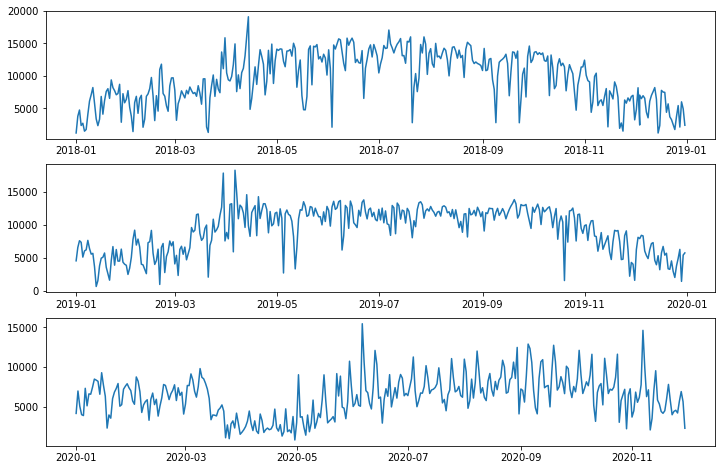

In [50]:
# by year, but separately

fig, ax = plt.subplots(3,1, figsize = (12,8))
ax[0].plot(bikes_2018['date'], bikes_2018['index'])
ax[1].plot(bikes_2019['date'], bikes_2019['index'])
ax[2].plot(bikes_2020['date'], bikes_2020['index']);

In [51]:
# add 7 day rolling averages

bikes_2018['mov_avg'] = bikes_2018['index'].rolling(7).sum()
bikes_2019['mov_avg'] = bikes_2019['index'].rolling(7).sum()
bikes_2020['mov_avg'] = bikes_2020['index'].rolling(7).sum()

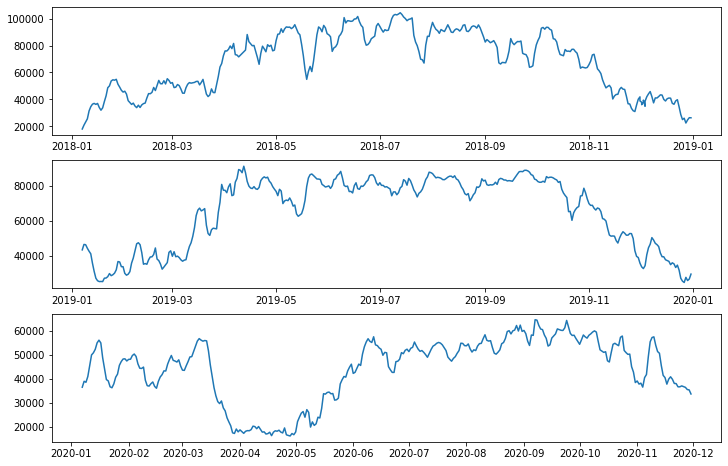

In [52]:
# rolling avg plot

fig, ax = plt.subplots(3,1, figsize = (12,8))
ax[0].plot(bikes_2018['date'], bikes_2018['mov_avg'])
ax[1].plot(bikes_2019['date'], bikes_2019['mov_avg'])
ax[2].plot(bikes_2020['date'], bikes_2020['mov_avg']);

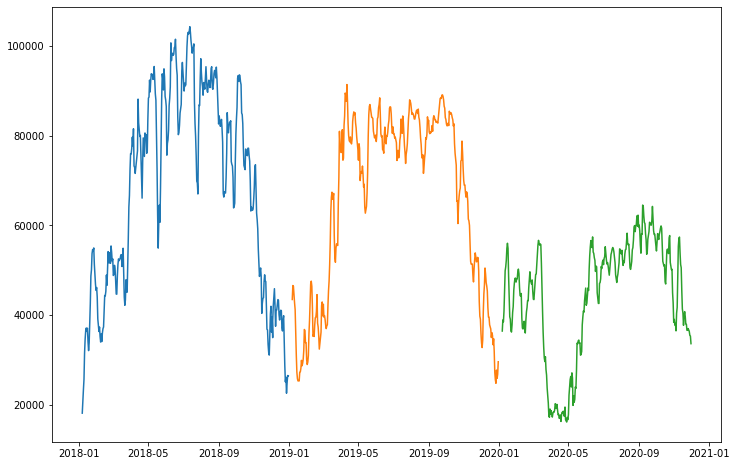

In [53]:
# attempt to put on same graph... 1

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(bikes_2018['date'], bikes_2018['mov_avg'])
ax.plot(bikes_2019['date'], bikes_2019['mov_avg'])
ax.plot(bikes_2020['date'], bikes_2020['mov_avg']);

In [54]:
# truncate 2019 to nov

bikes_2018_nov = bikes_2018[bikes_2018['month'] != 12]
bikes_2019_nov = bikes_2019[bikes_2019['month'] != 12]

In [55]:
bikes_2018.month.value_counts()

12    35
10    31
8     31
7     31
5     31
3     31
1     31
11    30
9     30
6     30
4     30
2     28
Name: month, dtype: int64

In [56]:
print(len(bikes_2018_nov), len(bikes_2019_nov), len(bikes_2020))

334 334 335


In [57]:
bikes_2020_2 = bikes_2020.iloc[:-1]
print(len(bikes_2020_2))

334


In [71]:
os.chdir('/home/samuel/Documents/research/project-dc/data/capital-bikeshare/')
os.getcwd()

'/home/samuel/Documents/research/project-dc/data/capital-bikeshare'

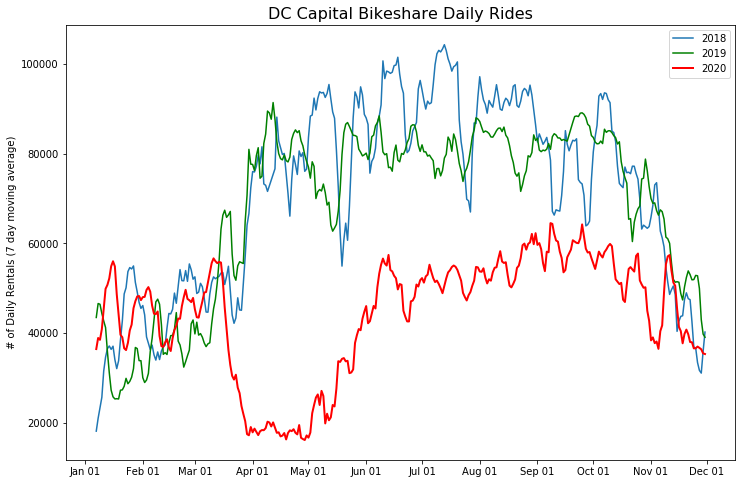

In [72]:
# on same graph....
# not as easy as it shoud be...
# used 2019 x axis (after shortening each to )
# 


month_day_fmt = mdates.DateFormatter('%b %d') # "Locale's abbreviated month name. + day of the month"

# attempt to put on same graph... 1

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(bikes_2019_nov['date'], bikes_2018_nov['mov_avg'], label = '2018')
ax.plot(bikes_2019_nov['date'], bikes_2019_nov['mov_avg'], label = '2019', color = 'g')
ax.plot(bikes_2019_nov['date'], bikes_2020_2['mov_avg'], label = '2020', color = 'r', linewidth = 2)
ax.set_ylabel('# of Daily Rentals (7 day moving average)')
ax.set_title('DC Capital Bikeshare Daily Rides', fontsize = 16)
ax.legend()

ax.xaxis.set_major_formatter(month_day_fmt)

#plt.savefig('DC_bikeshare_covid_fig.png');